# 📊 Notebook 01 - Exploration des Données

## Projet : Détection de Fraudes - Transactions par Chèque

**M2 SISE - Fouille de Données Massives**

---

### Objectifs de ce notebook

1. Charger et valider les données
2. Analyser les statistiques descriptives
3. Visualiser les distributions
4. Analyser le déséquilibre des classes
5. Identifier les corrélations et patterns

---

## 1. Configuration et imports

In [1]:
# Imports standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Style des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Taille par défaut des figures
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12



In [2]:
# Import de notre module personnalisé
import sys
sys.path.append('..')

from config.config import (
    RAW_DATA_DIR, DATA_FILENAME, TARGET_COLUMN, 
    COLUMNS_TO_EXCLUDE, RANDOM_STATE, FIGURES_DIR
)
from src.data_loader import (
    load_raw_data, validate_columns, convert_data_types,
    get_data_summary, split_by_date, print_data_summary
)



## 2. Chargement des données

In [3]:
# Chargement des données brutes
# IMPORTANT: Modifiez DATA_FILENAME dans config/config.py si nécessaire

df = load_raw_data(verbose=True)

 Chargement des données depuis: c:\Users\HP\Desktop\Master2\fouille_de_donnee\projet_Fouilles_de_Données_Massives\notebooks\..\data\raw\données.txt
 Données chargées: 4,646,774 lignes × 23 colonnes


In [4]:
# Aperçu des premières lignes
print("\n Aperçu des données (5 premières lignes):")
df.head()


 Aperçu des données (5 premières lignes):


,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.000,2017-02-01 07:32:14,1,0,0,0,551,0.000,0.000,0.000,37.187,52.076,0,1,4.000,4.000,4.000,20.000,0.000,27134
1,A013011306908024927155000,78643045,0,20.000,2017-02-01 07:43:37,1,0,0,0,551,0.000,0.000,0.000,48.845,52.076,1,2,1.798,4.000,4.000,28.610,8.610,27817
2,A013010002908283134592527,78643046,0,57.640,2017-02-01 07:47:38,1,0,0,0,549,0.000,0.000,0.000,73.118,52.076,0,1,4.000,4.000,4.000,57.640,0.000,28058
3,A011010002908105209831316,78643047,0,54.290,2017-02-01 07:48:48,0,1,1,1,267,0.000,0.000,0.000,110.057,53.554,0,1,4.000,4.000,4.000,54.290,0.000,28128
4,A013010041908000125652029,78643048,0,26.900,2017-02-01 08:13:27,1,0,0,0,549,0.004,8.586,0.001,45.368,52.076,1,1,1.997,4.000,4.000,59.150,32.250,29607


In [5]:
# Aperçu des dernières lignes
print("\n Aperçu des données (5 dernières lignes):")
df.tail()


 Aperçu des données (5 dernières lignes):


,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
4646769,A049010278908950520989501,84966399,0,23.940,2017-11-30 21:20:15,0,0,0,0,1,4.788,-22.543,1.970,42.073,43.030,0,1,5.000,5.000,5.000,23.940,0.000,76815
4646770,A075000438908140000997961,84966400,0,92.600,2017-11-30 21:22:49,0,0,0,0,514,0.060,-2.236,0.003,167.131,36.813,1,2,1.036,4.000,4.000,262.450,169.850,76969
4646771,A075000002908324024533014,84966401,0,69.000,2017-11-30 21:24:37,0,0,0,0,1,3.632,-1.063,0.791,72.607,52.076,0,1,5.000,5.000,5.000,69.000,0.000,77077
4646772,A078010004908211306074580,84966402,0,57.800,2017-11-30 21:57:32,0,0,0,0,1,28.900,0.568,0.582,31.881,82.051,0,1,5.000,5.000,5.000,57.800,0.000,79052
4646773,A013010041908023683750929,84966405,0,42.210,2017-11-30 22:07:13,0,0,0,0,461,0.005,-26.659,0.002,45.368,52.076,0,1,4.000,4.000,4.000,42.210,0.000,79633


In [6]:
# Validation des colonnes
validation = validate_columns(df)

print("\n Validation des colonnes:")
print(f"   - Valide: {validation['valid']}")
print(f"   - Colonnes attendues: {validation['expected_count']}")
print(f"   - Colonnes trouvées: {validation['actual_count']}")

if validation['missing_columns']:
    print(f"    Colonnes manquantes: {validation['missing_columns']}")
if validation['extra_columns']:
    print(f"    Colonnes supplémentaires: {validation['extra_columns']}")


 Validation des colonnes:
   - Valide: True
   - Colonnes attendues: 23
   - Colonnes trouvées: 23


In [7]:
# Conversion des types
df = convert_data_types(df, verbose=True)

 Colonne 'DateTransaction' convertie en datetime
 1 dates invalides converties en NaT
 Colonne 'FlagImpaye' convertie en int
 Colonne 'CodeDecision' convertie en category


## 3. Statistiques descriptives

In [8]:
# Résumé global
summary = get_data_summary(df)
print_data_summary(summary)


RÉSUMÉ DES DONNÉES

 Dimensions:
   - Lignes: 4,646,773
   - Colonnes: 23
   - Mémoire: 3272.11 MB

 Valeurs manquantes:
   - Total: 0

 Distribution de la cible (FlagImpaye):
   - 0 (Normal): 4,616,778 (99.35%)
   - 1 (Fraude): 29,995 (0.65%)
   - Ratio de déséquilibre: 1:153.9

 Période:
   - Début: 2017-02-01 07:32:14
   - Fin: 2017-11-30 22:07:13
   - Durée: 302 jours


In [9]:
# Information sur les types de données
print("\n Types de données:")
print(df.dtypes)


 Types de données:
ZIBZIN                              object
IDAvisAutorisationCheque            object
FlagImpaye                           int64
Montant                             object
DateTransaction             datetime64[ns]
CodeDecision                      category
VerifianceCPT1                      object
VerifianceCPT2                      object
VerifianceCPT3                      object
D2CB                                object
ScoringFP1                          object
ScoringFP2                          object
ScoringFP3                          object
TauxImpNb_RB                        object
TauxImpNB_CPM                       object
EcartNumCheq                        object
NbrMagasin3J                        object
DiffDateTr1                         object
DiffDateTr2                         object
DiffDateTr3                         object
CA3TRetMtt                          object
CA3TR                               object
Heure                             

In [10]:
# Statistiques descriptives pour les variables numériques
print("\n Statistiques descriptives (variables numériques):")
df.describe().T


 Statistiques descriptives (variables numériques):


,count,mean,min,25%,50%,75%,max,std
FlagImpaye,4646773.000,0.006,0.000,0.000,0.000,0.000,1.000,0.080
DateTransaction,4646773,2017-05-18 06:35:27.977373952,2017-02-01 07:32:14,2017-03-11 18:03:28,2017-04-20 15:18:42,2017-07-16 12:10:37,2017-11-30 22:07:13,NaN


In [11]:
# Valeurs manquantes détaillées
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct
}).sort_values('Valeurs manquantes', ascending=False)

print("\n Valeurs manquantes par colonne:")
missing_df[missing_df['Valeurs manquantes'] > 0]


 Valeurs manquantes par colonne:


,Valeurs manquantes,Pourcentage (%)


## 4. Analyse du déséquilibre des classes

In [12]:
# Distribution de la variable cible
target_counts = df[TARGET_COLUMN].value_counts()
target_pct = df[TARGET_COLUMN].value_counts(normalize=True) * 100

print(f"\n Distribution de la variable cible '{TARGET_COLUMN}':")
print("\n   Valeur | Count      | Pourcentage")
print("   " + "-" * 40)
for val in target_counts.index:
    label = "Normal" if val == 0 else "Fraude"
    print(f"   {val} ({label:6s}) | {target_counts[val]:>10,} | {target_pct[val]:>6.2f}%")

imbalance_ratio = target_counts.min() / target_counts.max()
print(f"\n    Ratio de déséquilibre: {imbalance_ratio:.4f} (1:{1/imbalance_ratio:.0f})")


 Distribution de la variable cible 'FlagImpaye':

   Valeur | Count      | Pourcentage
   ----------------------------------------
   0 (Normal) |  4,616,778 |  99.35%
   1 (Fraude) |     29,995 |   0.65%

    Ratio de déséquilibre: 0.0065 (1:154)


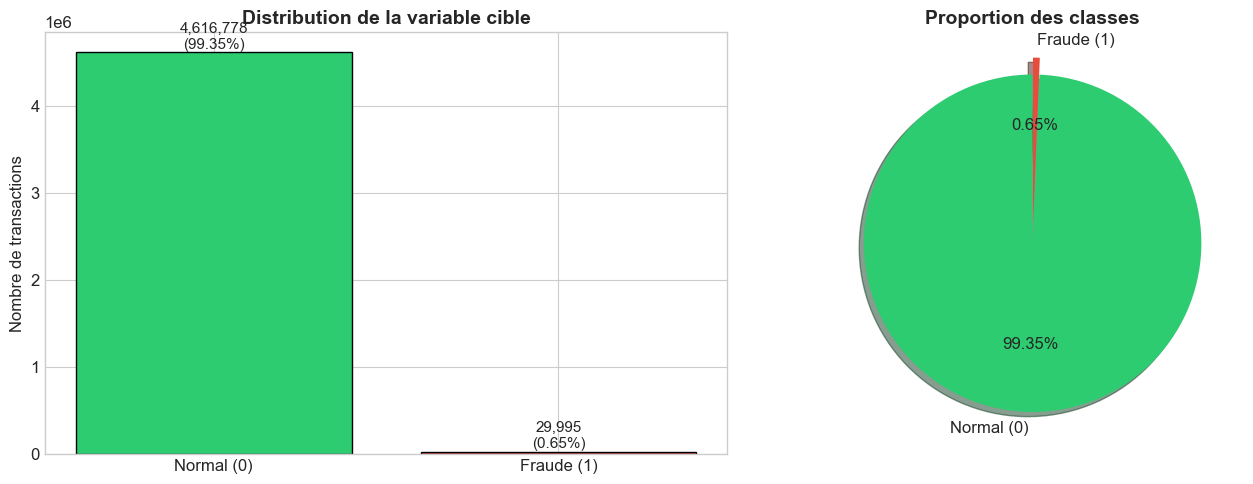


💾 Figure sauvegardée: c:\Users\HP\Desktop\Master2\fouille_de_donnee\projet_Fouilles_de_Données_Massives\notebooks\..\reports\figures\class_distribution.png


In [13]:
# Visualisation du déséquilibre
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['Normal (0)', 'Fraude (1)'], target_counts.values, color=colors, edgecolor='black')
axes[0].set_ylabel('Nombre de transactions', fontsize=12)
axes[0].set_title('Distribution de la variable cible', fontsize=14, fontweight='bold')

# Ajouter les valeurs sur les barres
for bar, count, pct in zip(bars, target_counts.values, target_pct.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                 f'{count:,}\n({pct:.2f}%)', ha='center', va='bottom', fontsize=11)

# Graphique en camembert
axes[1].pie(target_counts.values, labels=['Normal (0)', 'Fraude (1)'], 
            autopct='%1.2f%%', colors=colors, explode=[0, 0.1],
            shadow=True, startangle=90)
axes[1].set_title('Proportion des classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Figure sauvegardée: {FIGURES_DIR / 'class_distribution.png'}")

## 5. Analyse des variables

In [27]:
# Liste des variables numériques (excluant les identifiants et la date)
exclude_cols = ['ZIBZIN', 'IDAvisAutorisationCheque', 'DateTransaction', 'CodeDecision']
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                if col not in exclude_cols]

print(f"\n📊 Variables numériques à analyser ({len(numeric_cols)}):")
for i, col in enumerate(numeric_cols, 1):
    print(f"   {i:2d}. {col}")


📊 Variables numériques à analyser (4):
    1. FlagImpaye
    2. Month
    3. DayOfWeek
    4. Hour


In [28]:
# Statistiques du montant par classe
print("\n Statistiques du montant par classe:")
df.groupby(TARGET_COLUMN)['Montant'].describe().T


 Statistiques du montant par classe:


FlagImpaye,0,1
count,4616778.000,29995.000
unique,54378.000,11952.000
top,30.000,40.000
freq,36551.000,340.000


In [29]:
# Analyse de la variable CodeDecision
print("\n Distribution de CodeDecision:")
code_counts = df['CodeDecision'].value_counts().sort_index()
print(code_counts)

# Crosstab avec la cible
print("\n Crosstab CodeDecision vs FlagImpaye:")
ct = pd.crosstab(df['CodeDecision'], df[TARGET_COLUMN], margins=True, margins_name='Total')
ct


 Distribution de CodeDecision:
CodeDecision
0    3483828
1    1107925
2      19469
3       2783
4          1
0      18958
1      13701
2         93
3         15
Name: count, dtype: int64

 Crosstab CodeDecision vs FlagImpaye:


FlagImpaye,0,1,Total
CodeDecision,,,
0,3473957,9871,3483828
1,1107644,281,1107925
2,700,18769,19469
3,1849,934,2783
4,1,0,1
0,18913,45,18958
1,13699,2,13701
2,4,89,93
3,11,4,15


In [30]:
# Taux de fraude par CodeDecision
fraud_rate_by_code = df.groupby('CodeDecision')[TARGET_COLUMN].mean() * 100

print("\n Taux de fraude par CodeDecision:")
for code, rate in fraud_rate_by_code.items():
    print(f"   Code {code}: {rate:.2f}%")


 Taux de fraude par CodeDecision:
   Code 0: 0.28%
   Code 1: 0.03%
   Code 2: 96.40%
   Code 3: 33.56%
   Code 4: 0.00%
   Code 0: 0.24%
   Code 1: 0.01%
   Code 2: 95.70%
   Code 3: 26.67%


## 6. Analyse temporelle

In [31]:
# Extraction des composantes temporelles
df['Date'] = df['DateTransaction'].dt.date
df['Month'] = df['DateTransaction'].dt.month
df['DayOfWeek'] = df['DateTransaction'].dt.dayofweek
df['Hour'] = df['DateTransaction'].dt.hour

# Transactions par mois
monthly_stats = df.groupby('Month').agg({
    TARGET_COLUMN: ['count', 'sum', 'mean']
}).round(4)
monthly_stats.columns = ['Total', 'Fraudes', 'Taux_fraude']

print("\n📅 Statistiques mensuelles:")
monthly_stats


📅 Statistiques mensuelles:


,Total,Fraudes,Taux_fraude
Month,,,
2,839001,4058,0.005
3,911489,4815,0.005
4,926091,4685,0.005
5,362375,2794,0.008
6,301179,2388,0.008
7,288323,2430,0.008
8,270904,2252,0.008
9,252290,2177,0.009
10,242085,2153,0.009


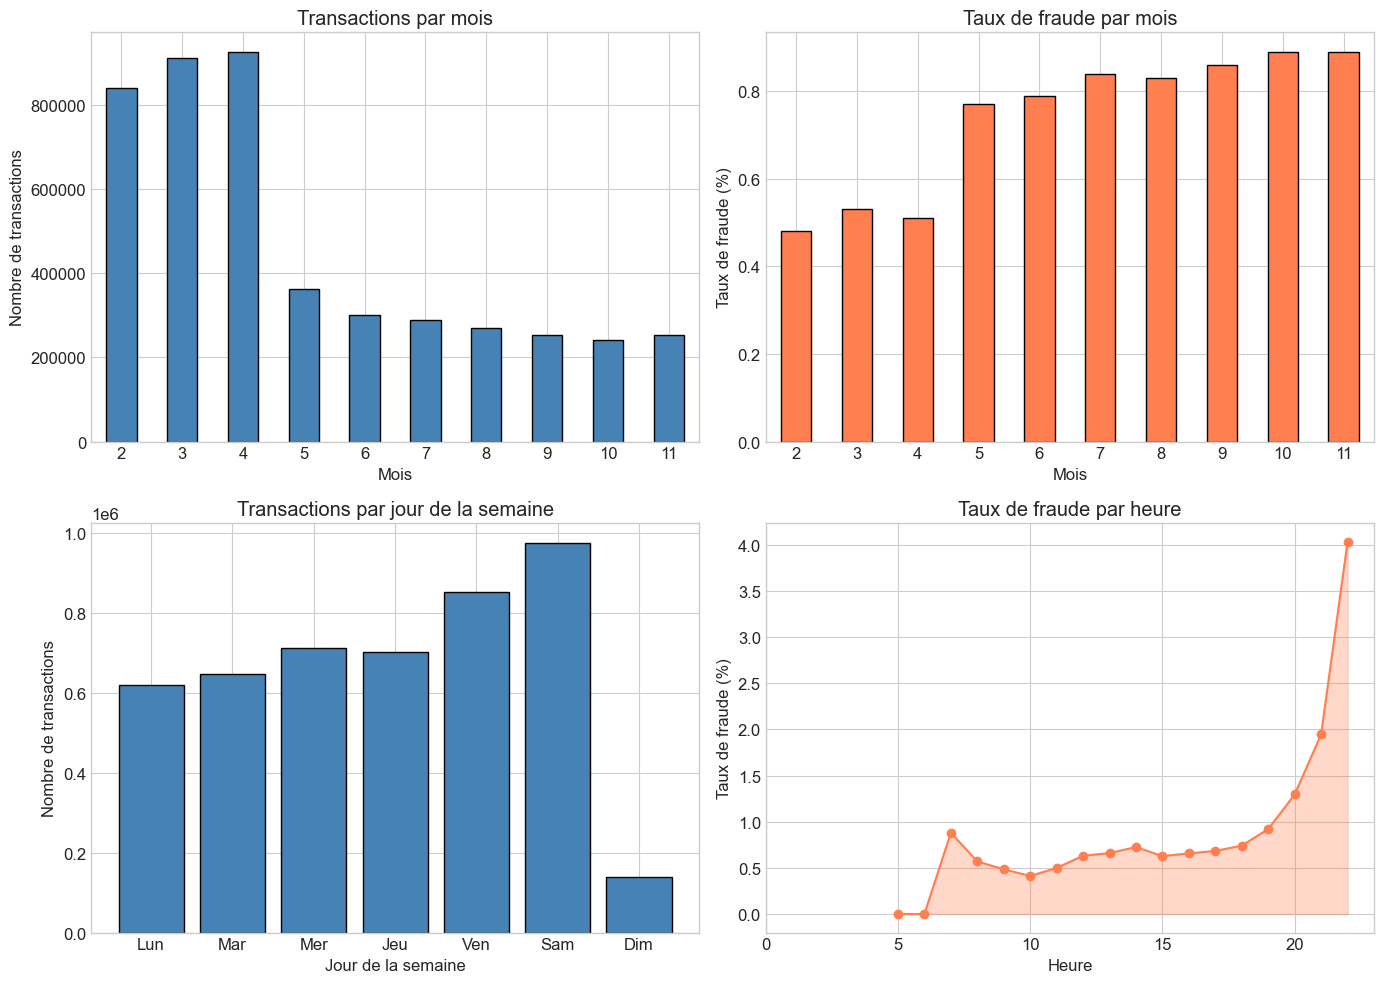

In [32]:
# Visualisation temporelle
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Transactions par mois
monthly_stats['Total'].plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Mois')
axes[0, 0].set_ylabel('Nombre de transactions')
axes[0, 0].set_title('Transactions par mois')
axes[0, 0].tick_params(axis='x', rotation=0)

# Taux de fraude par mois
(monthly_stats['Taux_fraude'] * 100).plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Mois')
axes[0, 1].set_ylabel('Taux de fraude (%)')
axes[0, 1].set_title('Taux de fraude par mois')
axes[0, 1].tick_params(axis='x', rotation=0)

# Transactions par jour de la semaine
dow_stats = df.groupby('DayOfWeek')[TARGET_COLUMN].agg(['count', 'mean'])
days = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
axes[1, 0].bar(days, dow_stats['count'], color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Jour de la semaine')
axes[1, 0].set_ylabel('Nombre de transactions')
axes[1, 0].set_title('Transactions par jour de la semaine')

# Taux de fraude par heure
hourly_fraud = df.groupby('Hour')[TARGET_COLUMN].mean() * 100
axes[1, 1].plot(hourly_fraud.index, hourly_fraud.values, marker='o', color='coral')
axes[1, 1].fill_between(hourly_fraud.index, hourly_fraud.values, alpha=0.3, color='coral')
axes[1, 1].set_xlabel('Heure')
axes[1, 1].set_ylabel('Taux de fraude (%)')
axes[1, 1].set_title('Taux de fraude par heure')
axes[1, 1].set_xlim(0, 23)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Analyse des corrélations

Colonnes numériques détectées : ['FlagImpaye', 'Month', 'DayOfWeek', 'Hour']
Colonnes utilisées pour corrélation : ['FlagImpaye', 'Month', 'DayOfWeek', 'Hour']
Shape corr_matrix : (4, 4)
            FlagImpaye  Month  DayOfWeek   Hour
FlagImpaye       1.000  0.019     -0.002  0.018
Month            0.019  1.000     -0.021  0.045
DayOfWeek       -0.002 -0.021      1.000 -0.057
Hour             0.018  0.045     -0.057  1.000


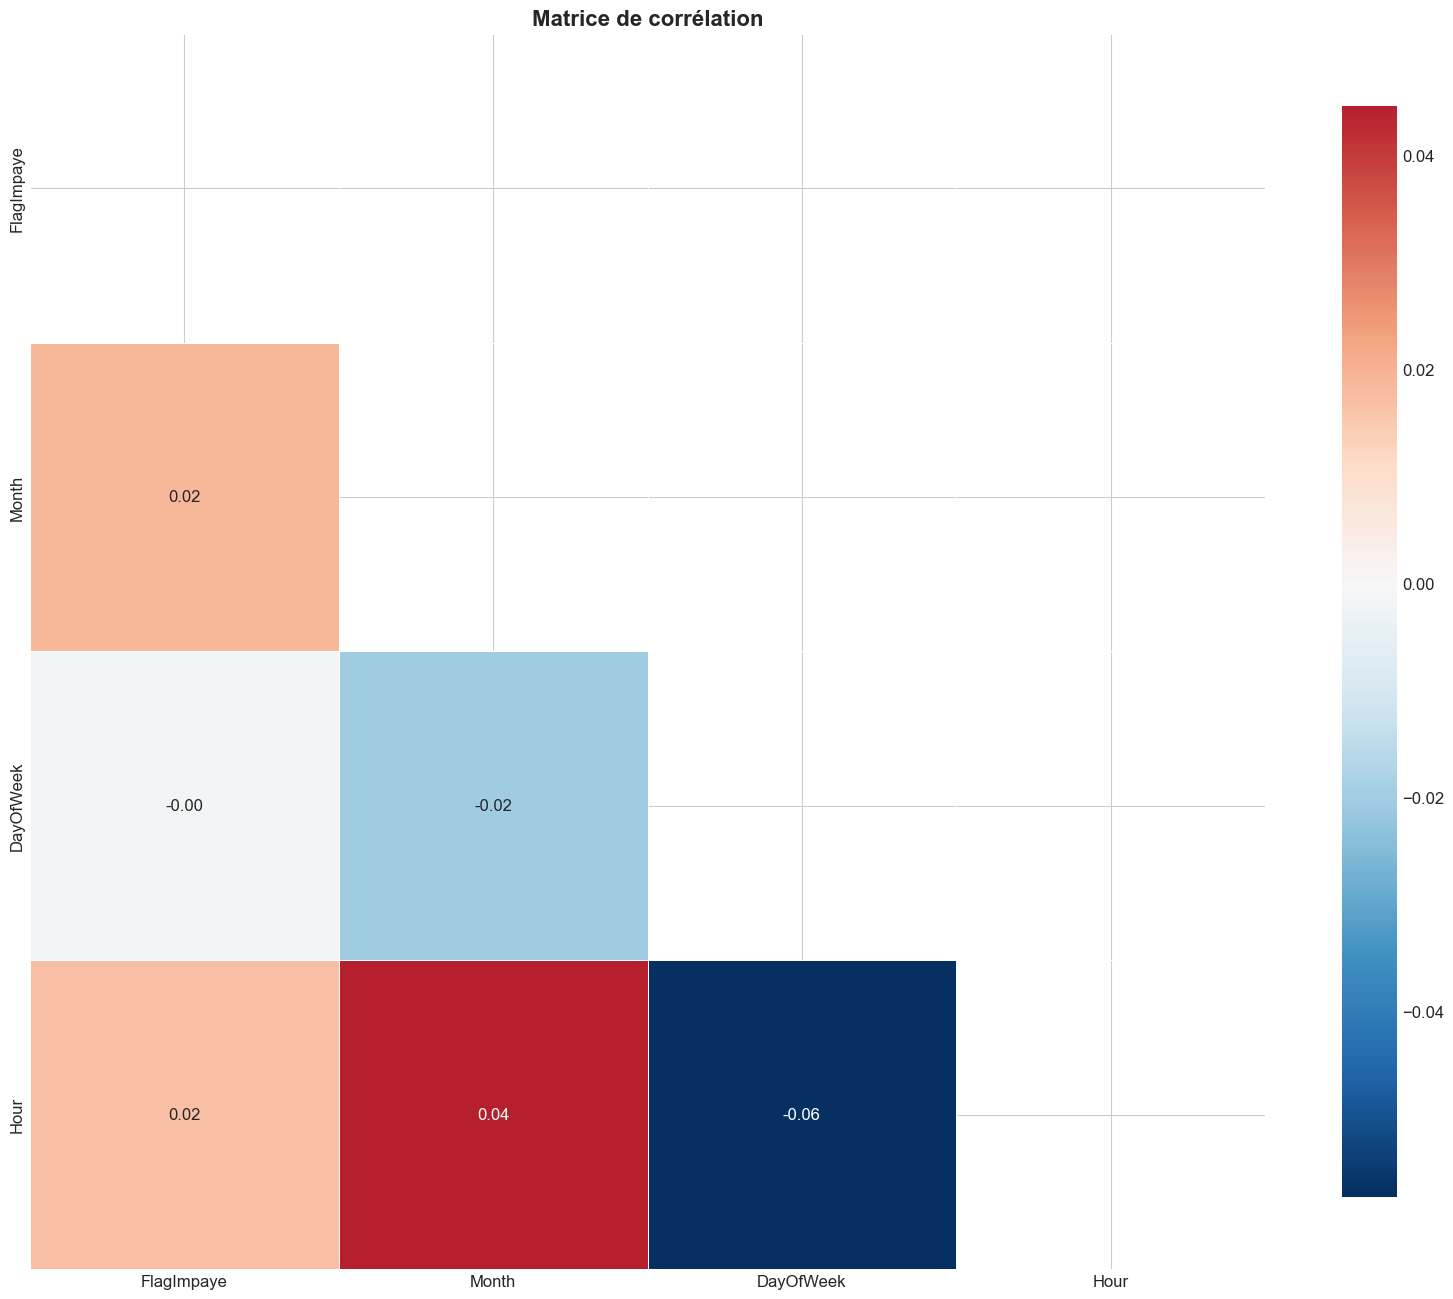

In [33]:
# Matrice de corrélation
corr_cols = numeric_cols + [TARGET_COLUMN] if TARGET_COLUMN not in numeric_cols else numeric_cols
corr_matrix = df[corr_cols].corr()
print("Colonnes numériques détectées :", numeric_cols)
print("Colonnes utilisées pour corrélation :", corr_cols)
print("Shape corr_matrix :", corr_matrix.shape)
print(corr_matrix)

# Heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Matrice de corrélation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Corrélations avec la variable cible
target_corr = corr_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(key=abs, ascending=False)

print(f"\n Corrélations avec {TARGET_COLUMN} (triées par valeur absolue):")
print("\n   Variable               | Corrélation")
print("   " + "-" * 40)
for var, corr in target_corr.items():
    print(f"   {var:25s} | {corr:+.4f}")


 Corrélations avec FlagImpaye (triées par valeur absolue):

   Variable               | Corrélation
   ----------------------------------------
   Month                     | +0.0189
   Hour                      | +0.0175
   DayOfWeek                 | -0.0017


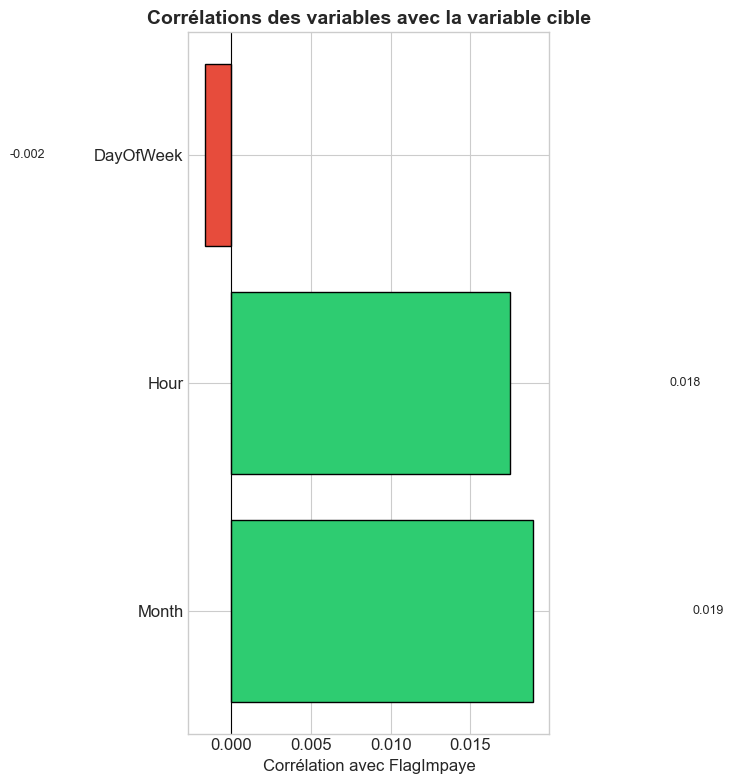

In [35]:
# Visualisation des corrélations avec la cible
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in target_corr.values]
bars = ax.barh(target_corr.index, target_corr.values, color=colors, edgecolor='black')
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_xlabel('Corrélation avec FlagImpaye', fontsize=12)
ax.set_title('Corrélations des variables avec la variable cible', fontsize=14, fontweight='bold')

# Ajouter les valeurs
for bar, val in zip(bars, target_corr.values):
    x_pos = val + 0.01 if val >= 0 else val - 0.01
    ha = 'left' if val >= 0 else 'right'
    ax.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
            va='center', ha=ha, fontsize=9)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'target_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Séparation Train/Test

In [23]:
# Séparation temporelle selon le sujet
df_train, df_test = split_by_date(df, verbose=True)


 Séparation temporelle:
   Train: 2017-02-01 → 2017-08-31
   - 3,899,362 transactions
   - Fraudes: 23,422 (0.60%)

   Test: 2017-09-01 → 2017-11-30
   - 747,411 transactions
   - Fraudes: 6,573 (0.88%)


In [24]:
# Vérification de la cohérence
print("\n Vérification de la séparation:")
print(f"   Train - Date min: {df_train['DateTransaction'].min()}")
print(f"   Train - Date max: {df_train['DateTransaction'].max()}")
print(f"   Test  - Date min: {df_test['DateTransaction'].min()}")
print(f"   Test  - Date max: {df_test['DateTransaction'].max()}")

# Vérifier qu'il n'y a pas de chevauchement
assert df_train['DateTransaction'].max() < df_test['DateTransaction'].min(), "⚠️ Chevauchement détecté!"
print("\n Aucun chevauchement entre train et test")


 Vérification de la séparation:
   Train - Date min: 2017-02-01 07:32:14
   Train - Date max: 2017-08-31 21:57:53
   Test  - Date min: 2017-09-01 07:34:17
   Test  - Date max: 2017-11-30 22:07:13

 Aucun chevauchement entre train et test


## 9. Résumé et conclusions de l'exploration

In [25]:
print("\n" + "=" * 70)
print("RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("=" * 70)

print(f"\n📊 DONNÉES:")
print(f"   - Total: {len(df):,} transactions")
print(f"   - Variables: {len(df.columns)} colonnes")
print(f"   - Période: {df['DateTransaction'].min().date()} → {df['DateTransaction'].max().date()}")

print(f"\n🎯 DÉSÉQUILIBRE DES CLASSES:")
fraud_rate = df[TARGET_COLUMN].mean() * 100
print(f"   - Taux de fraude global: {fraud_rate:.2f}%")
print(f"   - Ratio: 1:{1/df[TARGET_COLUMN].mean():.0f}")
print(f"   → FORT DÉSÉQUILIBRE - nécessite techniques spécifiques")

print(f"\n📅 SÉPARATION TRAIN/TEST:")
print(f"   - Train: {len(df_train):,} ({len(df_train)/len(df)*100:.1f}%)")
print(f"   - Test: {len(df_test):,} ({len(df_test)/len(df)*100:.1f}%)")

print(f"\n🔗 VARIABLES LES PLUS CORRÉLÉES AVEC LA FRAUDE:")
for var, corr in target_corr.head(5).items():
    print(f"   - {var}: {corr:+.4f}")


print("\n" + "=" * 70)


RÉSUMÉ DE L'EXPLORATION DES DONNÉES

📊 DONNÉES:
   - Total: 4,646,773 transactions
   - Variables: 27 colonnes
   - Période: 2017-02-01 → 2017-11-30

🎯 DÉSÉQUILIBRE DES CLASSES:
   - Taux de fraude global: 0.65%
   - Ratio: 1:155
   → FORT DÉSÉQUILIBRE - nécessite techniques spécifiques

📅 SÉPARATION TRAIN/TEST:
   - Train: 3,899,362 (83.9%)
   - Test: 747,411 (16.1%)

🔗 VARIABLES LES PLUS CORRÉLÉES AVEC LA FRAUDE:



In [26]:
# Sauvegarde des données préparées pour le prochain notebook
from config.config import PROCESSED_DATA_DIR

df_train.to_pickle(PROCESSED_DATA_DIR / 'df_train.pkl')
df_test.to_pickle(PROCESSED_DATA_DIR / 'df_test.pkl')

print(f"\n Données sauvegardées:")
print(f"   - {PROCESSED_DATA_DIR / 'df_train.pkl'}")
print(f"   - {PROCESSED_DATA_DIR / 'df_test.pkl'}")


 Données sauvegardées:
   - c:\Users\HP\Desktop\Master2\fouille_de_donnee\projet_Fouilles_de_Données_Massives\notebooks\..\data\processed\df_train.pkl
   - c:\Users\HP\Desktop\Master2\fouille_de_donnee\projet_Fouilles_de_Données_Massives\notebooks\..\data\processed\df_test.pkl
